In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf


SEQ_LENGTH = 60 
FEATURES = ['Close', 'MA_7', 'MA_30', 'Daily_Return', 'Volatility_7d']


np.random.seed(42)
tf.random.set_seed(42)

try:
    
    df = pd.read_csv('data/crypto_data_model_ready.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    print("Données chargées avec succès.")
except FileNotFoundError:
    print("Erreur : Le fichier 'data/crypto_data_model_ready.csv' est introuvable.")
   

data = df[FEATURES].values


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
def create_sequences(data, seq_length):
    X, y = [], []
    target_col_index = 0 
    
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, target_col_index]) 
        
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, SEQ_LENGTH)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

model = Sequential()

# Couche 1
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Couche 2
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Couche de sortie
model.add(Dense(units=25))
model.add(Dense(units=1)) 

model.compile(optimizer='adam', loss='mean_squared_error')

print(model.summary())


early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)



Données chargées avec succès.
X_train shape: (1388, 60, 5)
X_test shape: (347, 60, 5)


c:\Users\sirin\anaconda3\envs\pfe_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,701 (127.74 KB)

 Trainable params: 32,701 (127.74 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0213 - val_loss: 0.0029
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0012 - val_loss: 0.0030
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Root Mean Squared Error (RMSE): 2464.096754562683


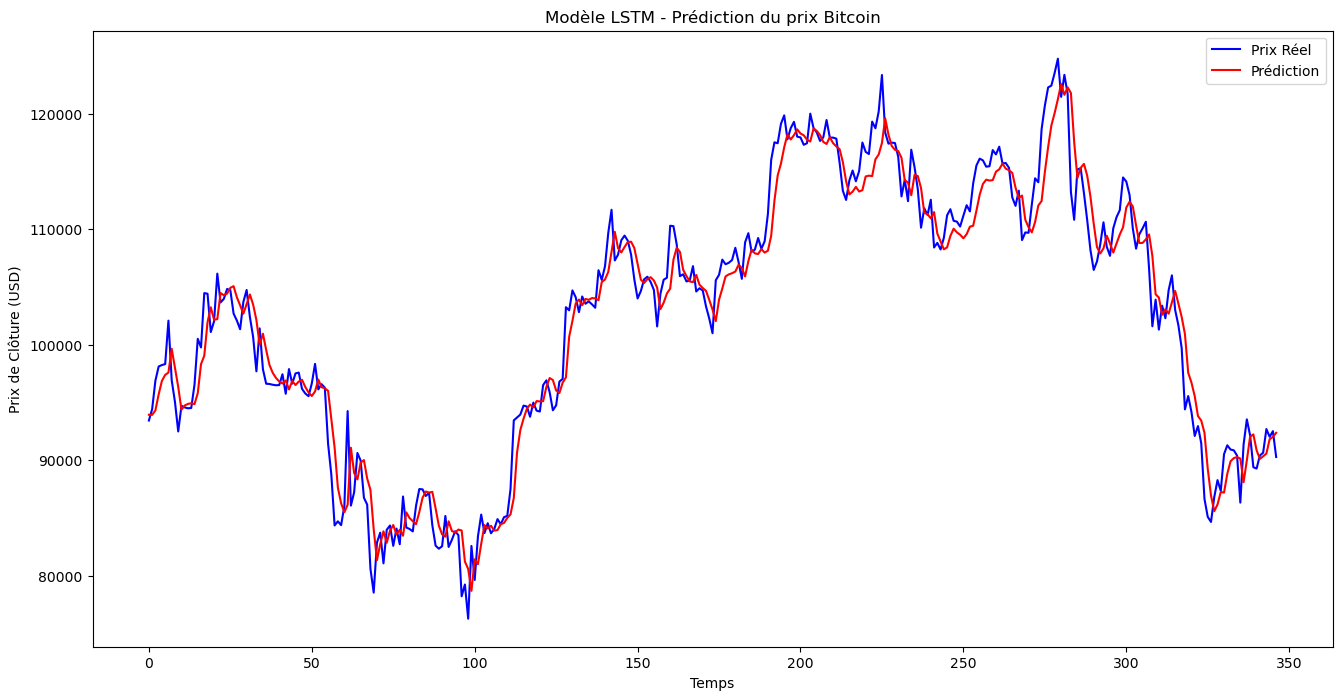

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Dernier prix connu : 90270.41 USD
Prix prédit pour demain : 91393.03 USD


In [10]:

predictions = model.predict(X_test)

# Inversion du scaling pour revenir aux prix réels
# On doit créer une matrice dummy car le scaler attend 5 colonnes
dummy_array = np.zeros((len(predictions), len(FEATURES)))
dummy_array[:, 0] = predictions.flatten()
inverse_predictions = scaler.inverse_transform(dummy_array)[:, 0]

dummy_y_test = np.zeros((len(y_test), len(FEATURES)))
dummy_y_test[:, 0] = y_test
inverse_y_test = scaler.inverse_transform(dummy_y_test)[:, 0]

rmse = np.sqrt(np.mean((inverse_predictions - inverse_y_test)**2))
print(f"Root Mean Squared Error (RMSE): {rmse}")

plt.figure(figsize=(16,8))
plt.title('Modèle LSTM - Prédiction du prix Bitcoin')
plt.xlabel('Temps')
plt.ylabel('Prix de Clôture (USD)')
plt.plot(inverse_y_test, label='Prix Réel', color='blue')
plt.plot(inverse_predictions, label='Prédiction', color='red')
plt.legend()
plt.show()

last_sequence = scaled_data[-SEQ_LENGTH:]
last_sequence = np.expand_dims(last_sequence, axis=0) 

future_pred_scaled = model.predict(last_sequence)

dummy_future = np.zeros((1, len(FEATURES)))
dummy_future[:, 0] = future_pred_scaled[0, 0]
future_price = scaler.inverse_transform(dummy_future)[0, 0]


print(f"Dernier prix connu : {df['Close'].iloc[-1]:.2f} USD")
print(f"Prix prédit pour demain : {future_price:.2f} USD")

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Root Mean Squared Error (RMSE): 2632.3185560913766


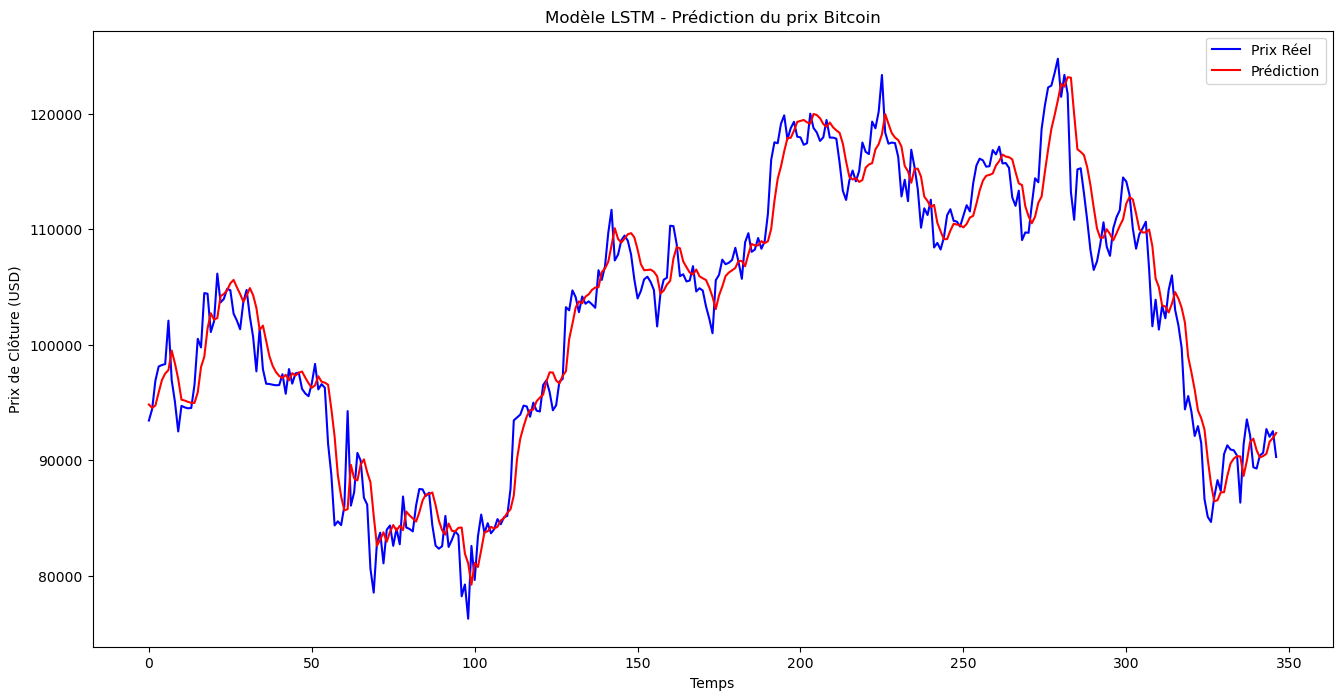

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Dernier prix connu : 90270.41 USD
Prix prédit pour demain : 91680.51 USD


In [ ]:

predictions = model.predict(X_test)

dummy_array = np.zeros((len(predictions), len(FEATURES)))
dummy_array[:, 0] = predictions.flatten()
inverse_predictions = scaler.inverse_transform(dummy_array)[:, 0]

dummy_y_test = np.zeros((len(y_test), len(FEATURES)))
dummy_y_test[:, 0] = y_test
inverse_y_test = scaler.inverse_transform(dummy_y_test)[:, 0]

rmse = np.sqrt(np.mean((inverse_predictions - inverse_y_test)**2))
print(f"Root Mean Squared Error (RMSE): {rmse}")

plt.figure(figsize=(16,8))
plt.title('Modèle LSTM - Prédiction du prix Bitcoin')
plt.xlabel('Temps')
plt.ylabel('Prix de Clôture (USD)')
plt.plot(inverse_y_test, label='Prix Réel', color='blue')
plt.plot(inverse_predictions, label='Prédiction', color='red')
plt.legend()
plt.show()

last_sequence = scaled_data[-SEQ_LENGTH:]
last_sequence = np.expand_dims(last_sequence, axis=0) 

future_pred_scaled = model.predict(last_sequence)

dummy_future = np.zeros((1, len(FEATURES)))
dummy_future[:, 0] = future_pred_scaled[0, 0]
future_price = scaler.inverse_transform(dummy_future)[0, 0]


print(f"Dernier prix connu : {df['Close'].iloc[-1]:.2f} USD")
print(f"Prix prédit pour demain : {future_price:.2f} USD")

In [23]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Prédictions train pour calculer R² train et nMAE train
train_pred = model.predict(X_train)
train_dummy = np.zeros((len(train_pred), len(FEATURES)))
train_dummy[:, 0] = train_pred.flatten()
train_inverse_pred = scaler.inverse_transform(train_dummy)[:, 0]

train_dummy_y = np.zeros((len(y_train), len(FEATURES)))
train_dummy_y[:, 0] = y_train
train_inverse_y = scaler.inverse_transform(train_dummy_y)[:, 0]

epsilon = 1e-8  

try:
    mae = mean_absolute_error(inverse_y_test, inverse_predictions)
    mape = np.mean(np.abs((inverse_y_test - inverse_predictions) / (np.abs(inverse_y_test) + epsilon))) * 100
    r2 = r2_score(inverse_y_test, inverse_predictions)

    mae_train = mean_absolute_error(train_inverse_y, train_inverse_pred)
    mape_train = np.mean(np.abs((train_inverse_y - train_inverse_pred) / (np.abs(train_inverse_y) + epsilon))) * 100
    r2_train = r2_score(train_inverse_y, train_inverse_pred)

    nmae_test = mae / (np.mean(np.abs(inverse_y_test)) + epsilon) * 100  
    nmae_train = mae_train / (np.mean(np.abs(train_inverse_y)) + epsilon) * 100

    print(f"RMSE (test) : {rmse:.2f} USD")
    print(f"MAE (test) : {mae:.2f} USD | nMAE (test) : {nmae_test:.2f}%")
    print(f"MAPE (test) : {mape:.2f}%")
    print(f"R² (test) : {r2:.4f}")
    print(f"MAE (train) : {mae_train:.2f} USD | nMAE (train) : {nmae_train:.2f}%")
    print(f"MAPE (train) : {mape_train:.2f}%")
    print(f"R² (train) : {r2_train:.4f}")

    

except ValueError as e:
    print(f"Erreur lors du calcul des métriques : {e}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
RMSE (test) : 2464.10 USD
MAE (test) : 1873.07 USD | nMAE (test) : 1.83%
MAPE (test) : 1.86%
R² (test) : 0.9546
MAE (train) : 1078.33 USD | nMAE (train) : 2.53%
MAPE (train) : 2.58%
R² (train) : 0.9933


In [4]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Prédictions train pour calculer R² train et nMAE train
train_pred = model.predict(X_train)
train_dummy = np.zeros((len(train_pred), len(FEATURES)))
train_dummy[:, 0] = train_pred.flatten()
train_inverse_pred = scaler.inverse_transform(train_dummy)[:, 0]

train_dummy_y = np.zeros((len(y_train), len(FEATURES)))
train_dummy_y[:, 0] = y_train
train_inverse_y = scaler.inverse_transform(train_dummy_y)[:, 0]

epsilon = 1e-8  

try:
    mae = mean_absolute_error(inverse_y_test, inverse_predictions)
    mape = np.mean(np.abs((inverse_y_test - inverse_predictions) / (np.abs(inverse_y_test) + epsilon))) * 100
    r2 = r2_score(inverse_y_test, inverse_predictions)

    mae_train = mean_absolute_error(train_inverse_y, train_inverse_pred)
    mape_train = np.mean(np.abs((train_inverse_y - train_inverse_pred) / (np.abs(train_inverse_y) + epsilon))) * 100
    r2_train = r2_score(train_inverse_y, train_inverse_pred)

    nmae_test = mae / (np.mean(np.abs(inverse_y_test)) + epsilon) * 100  
    nmae_train = mae_train / (np.mean(np.abs(train_inverse_y)) + epsilon) * 100

    print(f"RMSE (test) : {rmse:.2f} USD")
    print(f"MAE (test) : {mae:.2f} USD | nMAE (test) : {nmae_test:.2f}%")
    print(f"MAPE (test) : {mape:.2f}%")
    print(f"R² (test) : {r2:.4f}")
    print(f"MAE (train) : {mae_train:.2f} USD | nMAE (train) : {nmae_train:.2f}%")
    print(f"MAPE (train) : {mape_train:.2f}%")
    print(f"R² (train) : {r2_train:.4f}")

    

except ValueError as e:
    print(f"Erreur lors du calcul des métriques : {e}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
RMSE (test) : 2632.32 USD
MAE (test) : 1996.71 USD | nMAE (test) : 1.95%
MAPE (test) : 1.98%
R² (test) : 0.9482
MAE (train) : 1156.11 USD | nMAE (train) : 2.71%
MAPE (train) : 2.82%
R² (train) : 0.9925


In [27]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.6 MB 2.6 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/9.6 MB 2.2 MB/s eta 0:00:04
   ------ --------------------------------- 1.6/9.6 MB 2.3 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/9.6 MB 2.2 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6/9.6 MB 2.2 MB/s eta 0:00:04
   ------------- -------------------------- 3.1/9.6 MB 2.3 MB/s eta 0:00:03
   --------------- ------------------------ 3.7/9.6 MB 2.3 MB/s eta 0:00:03
   ----------------- ---------------------- 4.2/9.6 MB 2.4 MB/s eta 0:00:03
   ------------------ --------------------- 4.5/9.6 MB 2.3 MB/s eta 0:00:03
   -------------------- ------------------- 5.0/9.6 MB 2.4 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.6 MB 2.4 MB/s eta 0:00:02
   ---------------------- 

In [ ]:
# Installer xgboost si nécessaire
!pip install xgboost

=== XGBoost (séquences aplaties) ===
RMSE : 12767.27 USD | MAE : 10760.78 USD | MAPE : 10.22% | R² : -0.2177


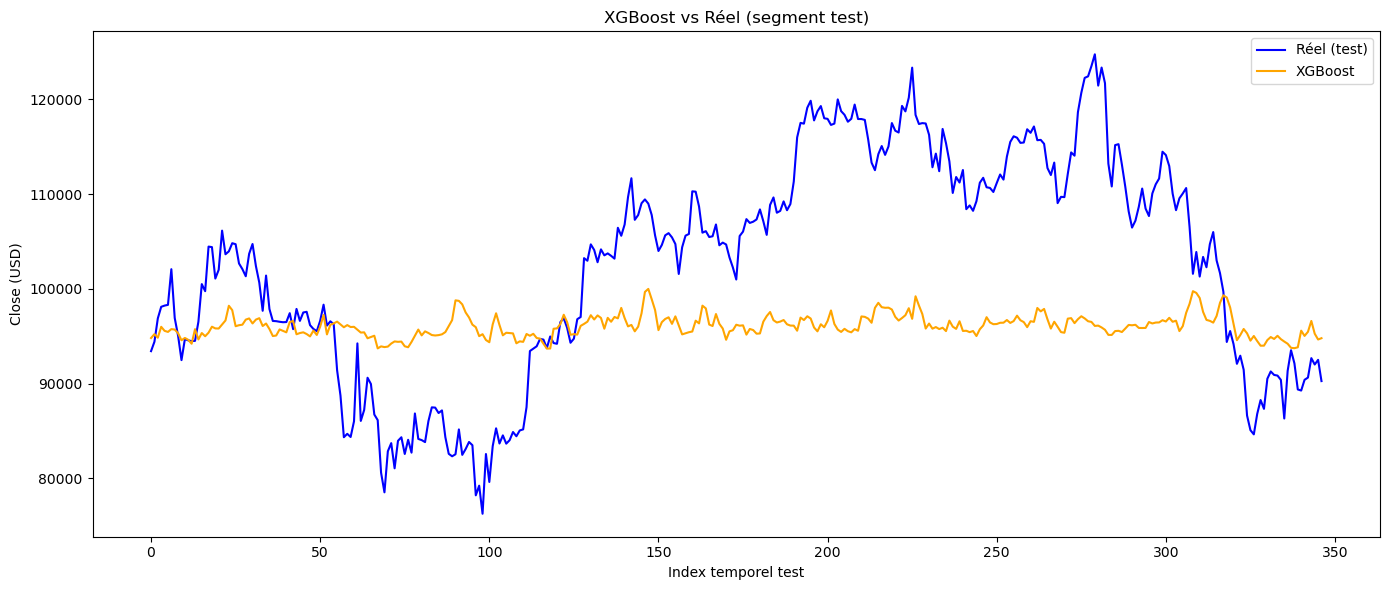

Prix prédit pour demain (XGBoost) : 95418.32 USD


In [30]:
# Modèle XGBoost sur les séquences aplaties
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Mise en forme des séquences pour XGBoost (flatten)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

xgb_model = XGBRegressor(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)
xgb_model.fit(X_train_flat, y_train)

# Prédictions test
xgb_pred = xgb_model.predict(X_test_flat)

# Inversion du scaling (utilise la même logique que pour le LSTM)
xgb_dummy = np.zeros((len(xgb_pred), len(FEATURES)))
xgb_dummy[:, 0] = xgb_pred
xgb_inverse_predictions = scaler.inverse_transform(xgb_dummy)[:, 0]

xgb_dummy_test = np.zeros((len(y_test), len(FEATURES)))
xgb_dummy_test[:, 0] = y_test
xgb_inverse_y_test = scaler.inverse_transform(xgb_dummy_test)[:, 0]

xgb_rmse = np.sqrt(mean_squared_error(xgb_inverse_y_test, xgb_inverse_predictions))
xgb_mae = mean_absolute_error(xgb_inverse_y_test, xgb_inverse_predictions)
with np.errstate(divide='ignore', invalid='ignore'):
    xgb_mape = np.mean(np.abs((xgb_inverse_y_test - xgb_inverse_predictions) / xgb_inverse_y_test)) * 100
    if np.isinf(xgb_mape) or np.isnan(xgb_mape):
        xgb_mape = 0
xgb_r2 = r2_score(xgb_inverse_y_test, xgb_inverse_predictions)

print("=== XGBoost (séquences aplaties) ===")
print(f"RMSE : {xgb_rmse:.2f} USD | MAE : {xgb_mae:.2f} USD | MAPE : {xgb_mape:.2f}% | R² : {xgb_r2:.4f}")

plt.figure(figsize=(14, 6))
plt.plot(xgb_inverse_y_test, label='Réel (test)', color='blue')
plt.plot(xgb_inverse_predictions, label='XGBoost', color='orange')
plt.legend()
plt.title('XGBoost vs Réel (segment test)')
plt.xlabel('Index temporel test')
plt.ylabel('Close (USD)')
plt.tight_layout()
plt.show()

# Prévision du jour suivant avec XGBoost
last_sequence_flat = last_sequence.reshape(1, -1)
future_xgb = xgb_model.predict(last_sequence_flat)[0]
future_dummy = np.zeros((1, len(FEATURES)))
future_dummy[:, 0] = future_xgb
future_price_xgb = scaler.inverse_transform(future_dummy)[0, 0]
print(f"Prix prédit pour demain (XGBoost) : {future_price_xgb:.2f} USD")

In [5]:
import numpy as np

np.savez(
    "data/lstm_results.npz",
    y_test_true=inverse_y_test,
    y_test_pred=inverse_predictions,
    metrics={"rmse": float(rmse), "mae": float(mae), "mape": float(mape), "r2": float(r2)},
    next_price=float(future_price),
)